In [15]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix



In [42]:
data_train=pd.read_csv('train.csv')
data_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
data_test=pd.read_csv('test.csv')
data_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [43]:
data_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [10]:
data_test.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [11]:
print(f"Train data has {data_train.shape[0]} rows and  {data_train.shape[1]} columns.")
print("Distribution of target value:\n")
data_train.satisfaction.value_counts()

Train data has 103904 rows and  25 columns.
Distribution of target value:



neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [12]:
print(f"Test data has {data_test.shape[0]} rows and {data_test.shape[1]} columns.")
print("Distribution of target value:\n")
data_test.satisfaction.value_counts()

Test data has 25976 rows and 25 columns.
Distribution of target value:



neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

In [48]:
data=data_train.append(data_test)
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [47]:
data.shape

(129880, 25)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,129880.0,44158.700000,31207.377062,0.0,16234.75,38963.5,71433.25,103903.0
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0


In [49]:
data.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [18]:
data.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [19]:
data.duplicated().sum()

0

In [20]:
data.nunique()

Unnamed: 0                           103904
id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [21]:
data.loc[data["Customer Type"]=="disloyal Customer","Customer Type"]="Disloyal Customer"
data.loc[data["Type of Travel"]=="Business travel","Type of Travel"]="Business Travel"

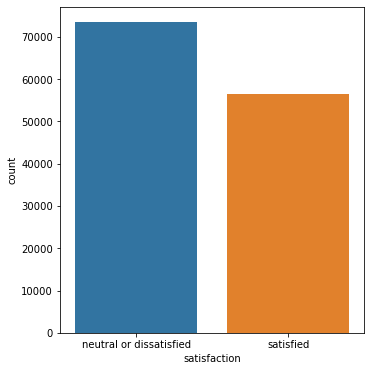

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='satisfaction', data=data)
plt.show()

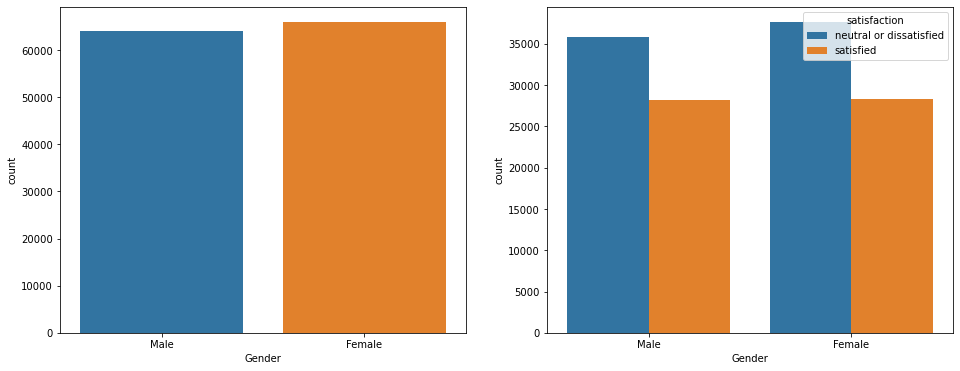

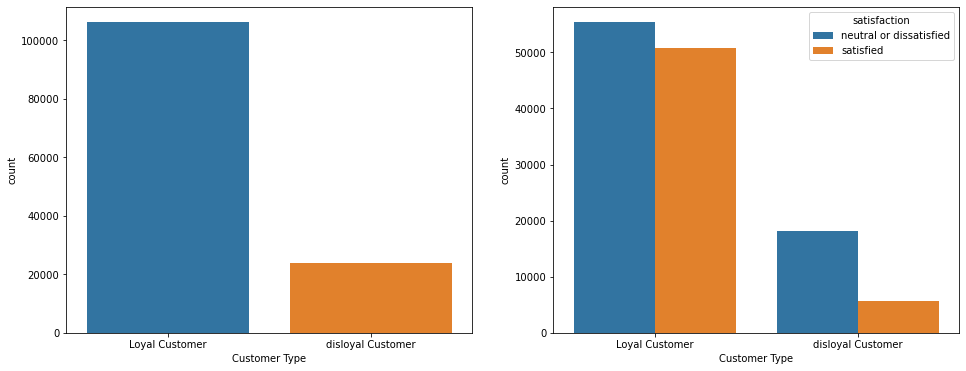

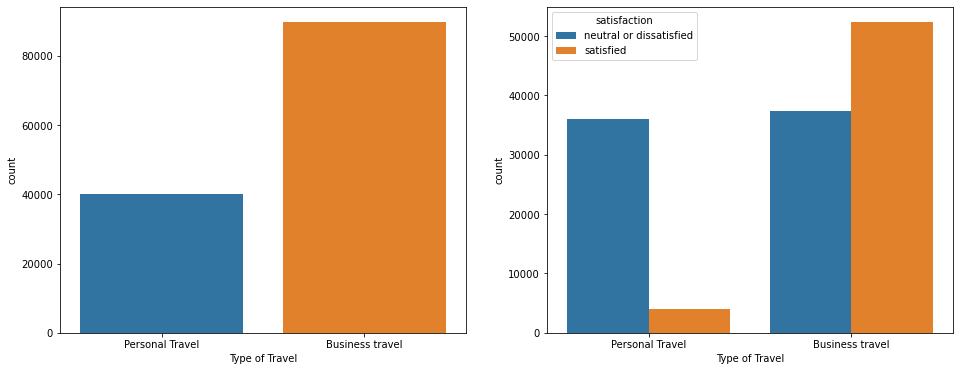

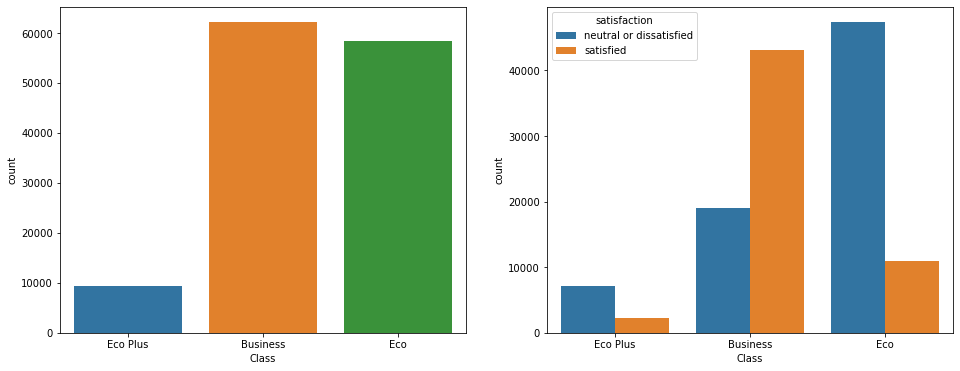

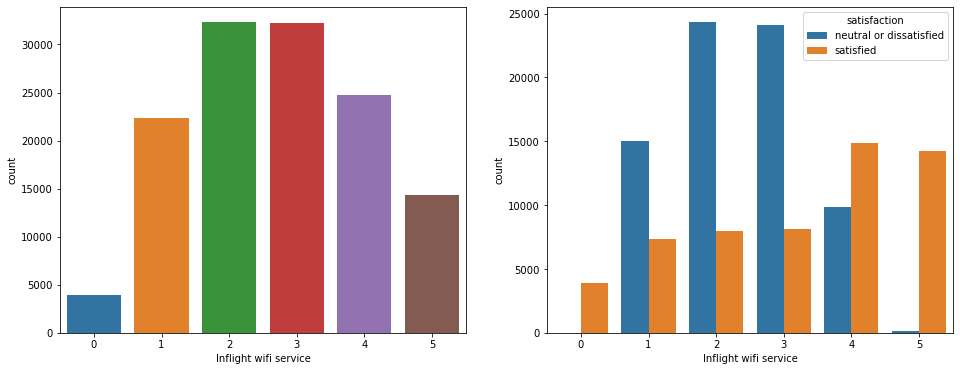

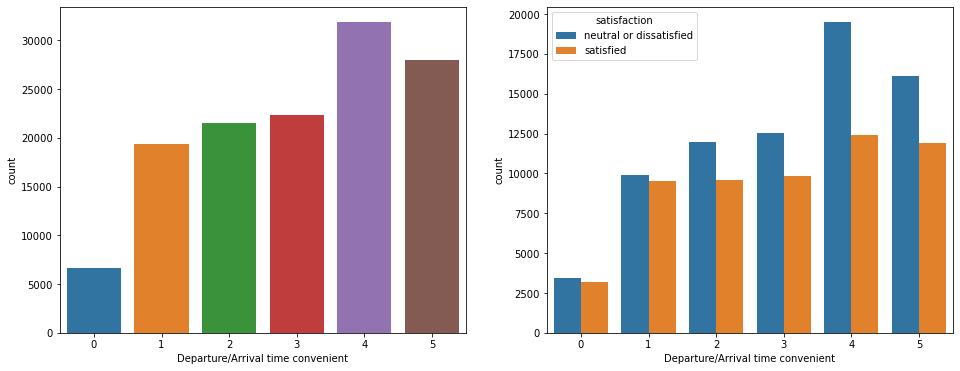

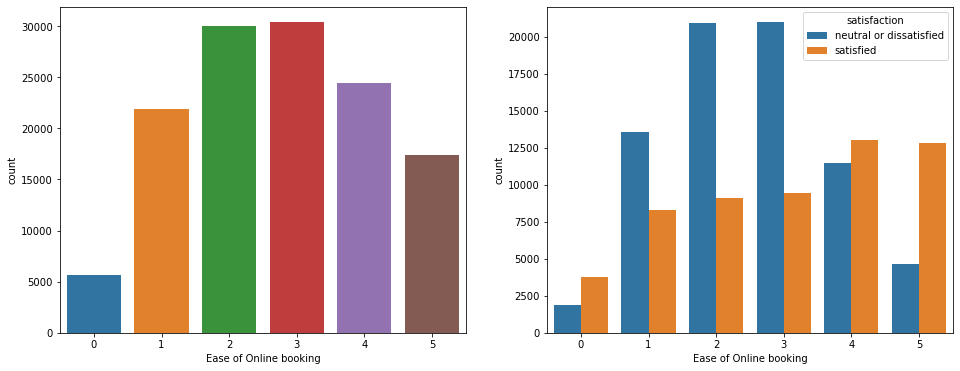

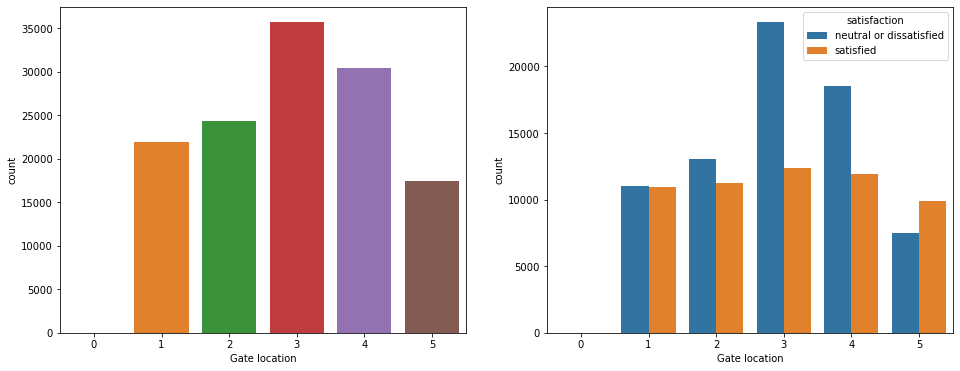

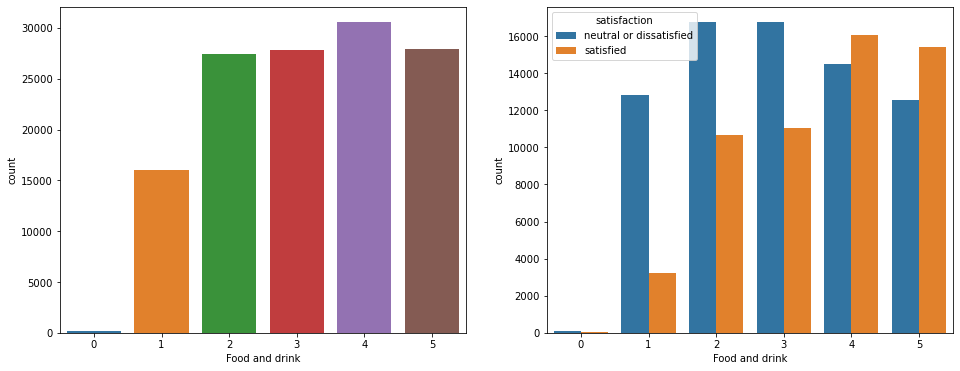

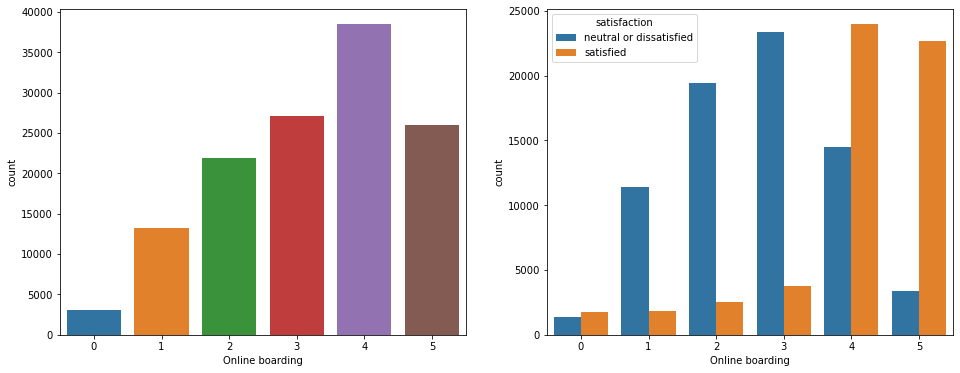

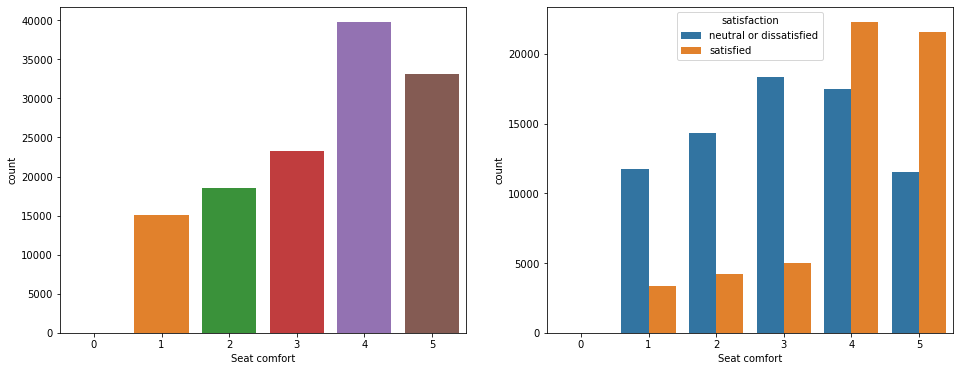

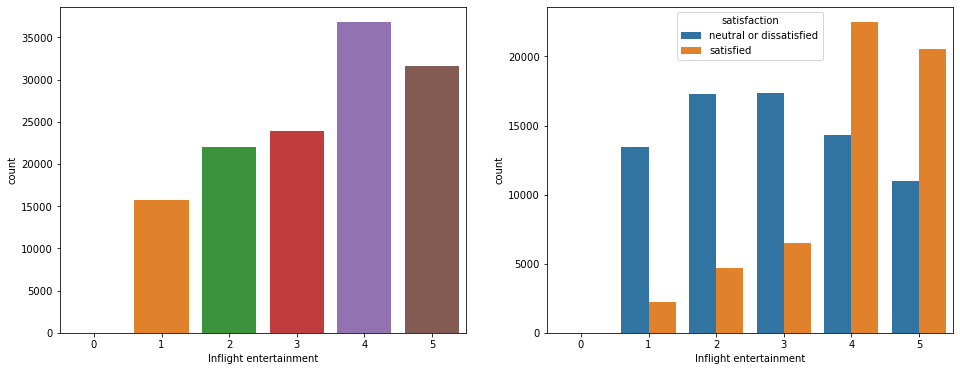

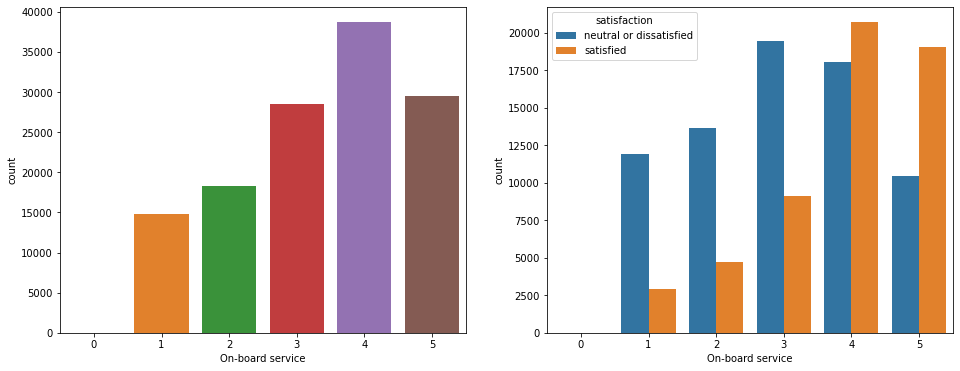

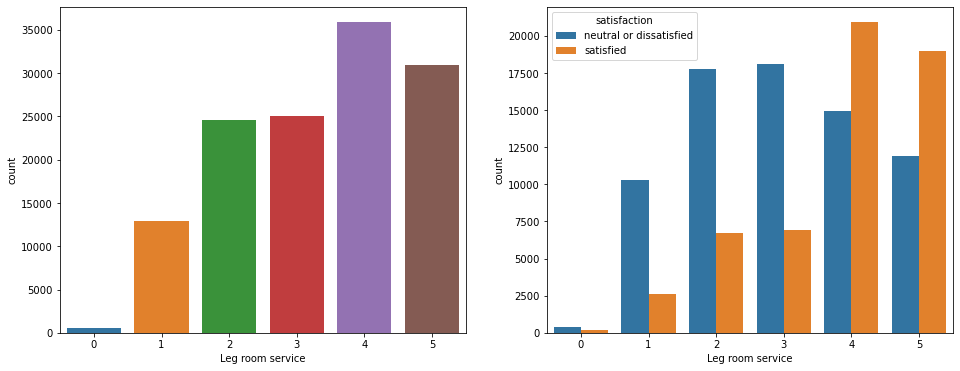

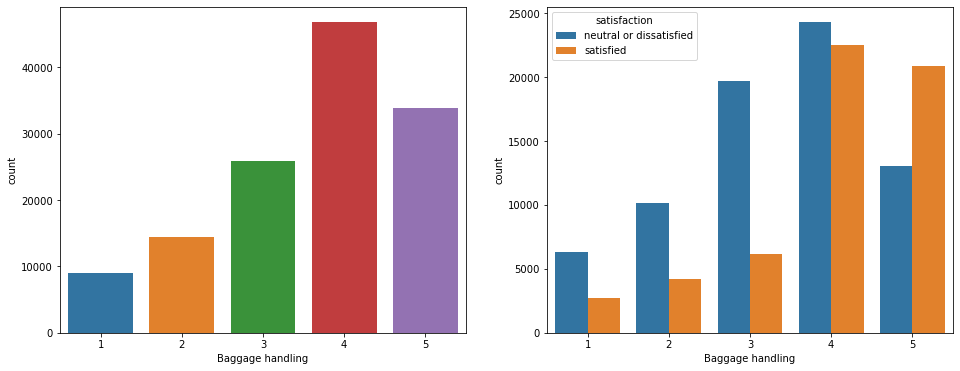

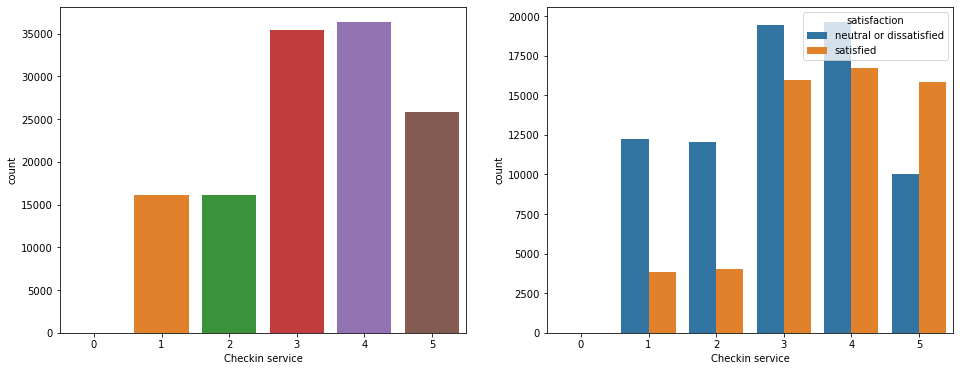

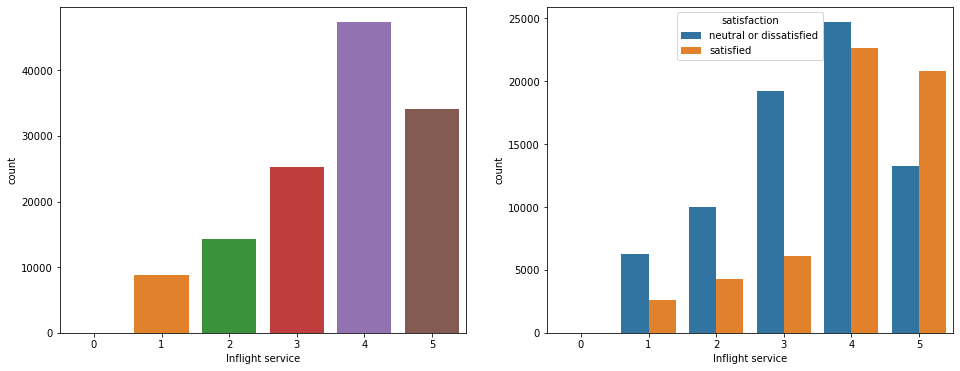

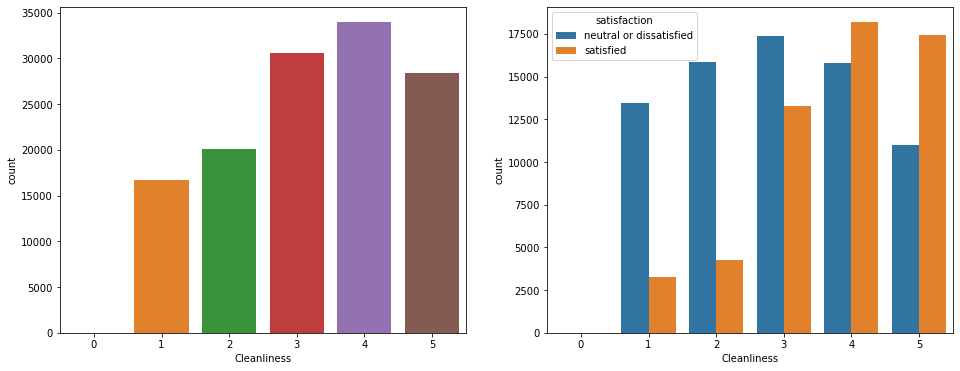

In [54]:
categorics=['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for i in categorics:
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  sns.countplot(x=data[i])

  plt.subplot(1,2,2)
  sns.countplot(x=data[i],hue=data.satisfaction)
  plt.show()

In [26]:
for i in ['Gender','Customer Type','Type of Travel','Class']:
  categorics.remove(i)

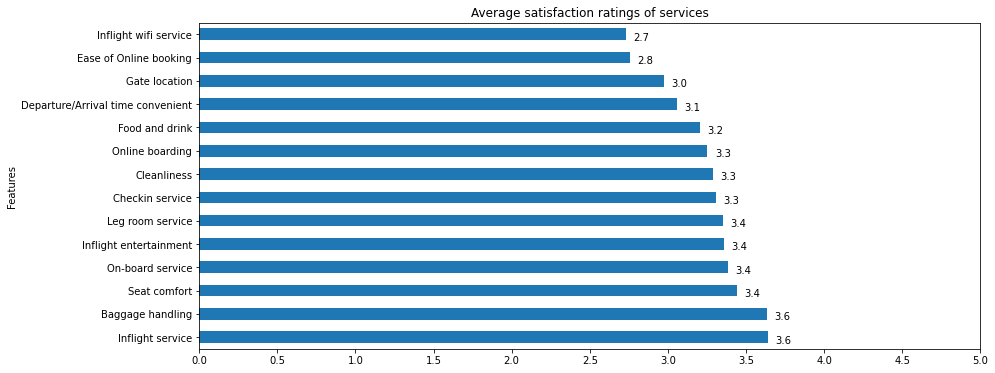

In [53]:
total = float(len(data))
ax = data[categorics].mean().sort_values(ascending=False).plot(kind="barh",ylabel="Features",xticks=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],figsize=(14,6))
plt.title('Average satisfaction ratings of services')
for p in ax.patches:
    count = '{:.1f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width()+0.15, p.get_y()
    ax.annotate(count, (x, y), ha='right')
plt.show()

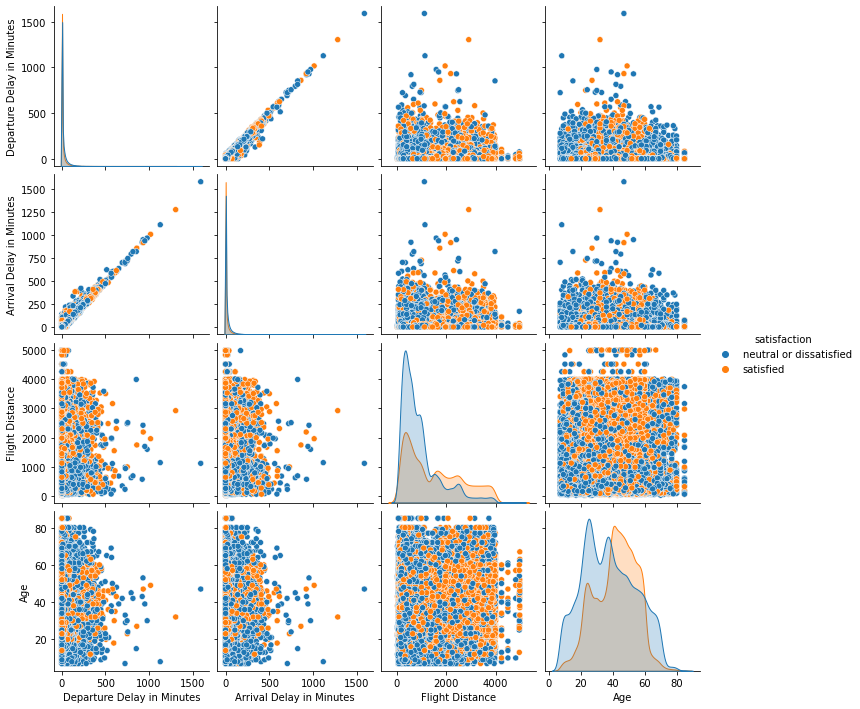

In [55]:
numerics=['Departure Delay in Minutes', 'Arrival Delay in Minutes','Flight Distance',"Age"]
sns.pairplot(data[[*numerics,"satisfaction"]],hue="satisfaction")
plt.show()

In [57]:
data.drop(["Unnamed: 0","id"],axis=1,inplace=True)
data_backup=data.copy()
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


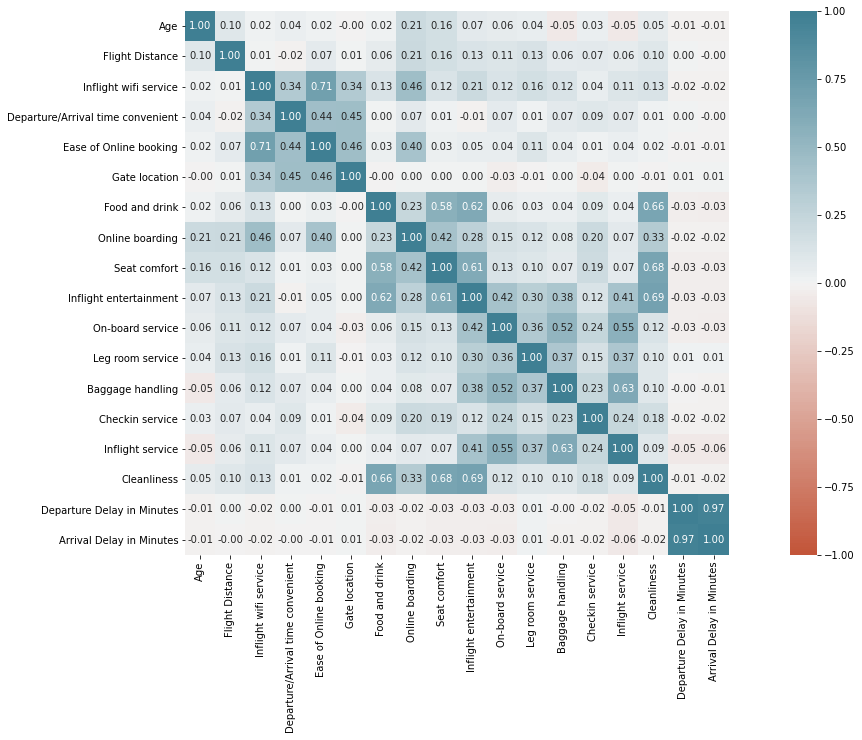

In [60]:
plt.figure(figsize=(22,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,annot=True,fmt='.2f',)
plt.show()

In [61]:
data.drop(["Arrival Delay in Minutes","Departure Delay in Minutes"],axis=1,inplace=True)

In [62]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,5,3,3,4,4,3,3,3,satisfied


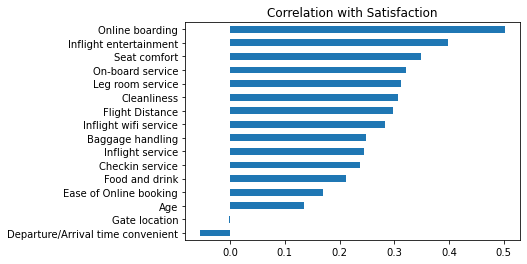

In [63]:
data_temp=data.copy()
data_temp["satisfaction"]=data_temp["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})
data_temp.corr()['satisfaction'].sort_values().drop('satisfaction').plot(kind='barh',title="Correlation with Satisfaction")
plt.show()

In [68]:
data[["Gender","Customer Type","Type of Travel","Class","satisfaction"]].head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,1,0
1,Male,disloyal Customer,Business travel,2,0
2,Female,Loyal Customer,Business travel,2,1
3,Female,Loyal Customer,Business travel,2,0
4,Male,Loyal Customer,Business travel,2,1


In [69]:
data["Class"] = data["Class"].map({'Business':2, 'Eco Plus':1, 'Eco':0})
data["satisfaction"]=data["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})

In [66]:
#for nominal features,
data_new=pd.get_dummies(data,drop_first=True)
#i use drop_first parameter so my model does not get any confusion by counting some features second time
data_new.reset_index(inplace=True)
data_new.drop("index",axis=1,inplace=True)
data_new.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,13,1,460,3,4,3,1,5,3,5,...,4,3,4,4,5,5,0,1,0,1
1,25,2,235,3,2,3,3,1,3,1,...,1,5,3,1,4,1,0,1,1,0
2,26,2,1142,2,2,2,2,5,5,5,...,4,3,4,4,4,5,1,0,0,0
3,25,2,562,2,5,5,5,2,2,2,...,2,5,3,1,4,2,0,0,0,0
4,61,2,214,3,3,3,3,4,5,5,...,3,4,4,3,3,3,1,1,0,0


In [72]:
data_new[["Gender_Male","Customer Type_disloyal Customer","Type of Travel_Personal Travel","Class","satisfaction"]].head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class,satisfaction
0,1,0,1,1,0
1,1,1,0,2,0
2,0,0,0,2,1
3,0,0,0,2,0
4,1,0,0,2,1


In [74]:
df_local=data_new.copy()

In [76]:
X_train, X_test, y_train, y_test=train_test_split(df_local.drop("satisfaction",axis=1),df_local["satisfaction"],test_size=0.3,random_state=42)

In [77]:
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (90916, 20)
Test size: (38964, 20)


In [78]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [89]:
#Creating a function that creates a dataframe for testing model performance
def model_perf(model,X_train,X_test,y_train,y_test,pred,model_name):
  """Takes the data, returns a dataframe that calculates the performance of the model"""
  cv_results=cross_val_score(model,X_train,y_train,cv=5)
  perf_df=pd.DataFrame({"Mean_CV":np.mean(cv_results),"Std_CV":np.std(cv_results),'Train_Score':model.score(X_train,y_train),"Test_Score":model.score(X_test,y_test),"Precision_Score":precision_score(y_test,pred),"Recall_Score":recall_score(y_test,pred),"F1_Score":f1_score(y_test,pred)},index=[model_name])
  return perf_df

In [94]:
log=LogisticRegression(random_state=42)
params={"C":[0.001,0.01,0.1,1,10],"penalty":["l1","l2"]}
searcher=GridSearchCV(log,params,cv=5,n_jobs=-1).fit(X_train_scaled,y_train)
best_model_log=searcher.best_estimator_
pred_log = best_model_log.predict(X_test_scaled)
print("Best Parameters:",searcher.best_params_)
y_pred_log_proba=best_model_log.predict_proba(X_test_scaled)[:,1]
print("ROC AUC Score:",roc_auc_score(y_test,y_pred_log_proba))
perf_log=model_perf(best_model_log,X_train_scaled,X_test_scaled,y_train,y_test,pred_log,"Logistic Regression")
perf_log

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.86388537        nan 0.87213477        nan 0.8728717
        nan 0.8728057         nan 0.8728277 ]
  warnings.warn(


Best Parameters: {'C': 0.1, 'penalty': 'l2'}
ROC AUC Score: 0.9255458568361002


,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Logistic Regression,0.872872,0.00206,0.872894,0.873755,0.868855,0.836679,0.852464
